# Install Yahoo Finance using PIP

In [22]:
!pip install yfinance
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
'mamba' is not recognized as an internal or external command,
operable program or batch file.


     ---------------------------------------- 3.6/3.6 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.3
    Uninstalling lxml-4.9.3:
      Successfully uninstalled lxml-4.9.3


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\matth\\AppData\\Local\\Programs\\Python\\Python38\\Lib\\site-packages\\~xml\\etree.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import Modules

In [14]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

Import Tesla stock data from yfinance and set the period.
Note: Tesla stock ticker is TSLA

In [9]:
# Tesla ticker = TSLA
tesla = yf.Ticker('TSLA')
tesla_data = tesla.history(period= 'max')

Use pandas to format the DataFrame and display data

In [10]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Get Tesla Revenue using Beautiful Soup

In [24]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data = requests.get(url).text
print(data)


<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
 "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html>
  <head>
    <title>403 Forbidden</title>
  </head>
  <body>
    <h1>Error 403 Forbidden</h1>
    <p>Forbidden</p>
    <h3>Error 54113</h3>
    <p>Details: cache-nrt-rjtf7700024-NRT 1690938600 1802628960</p>
    <hr>
    <p>Varnish cache server</p>
  </body>
</html>



Do the same for Gamestop Data
Note: GameStop ticker = "GME"

In [11]:
# GameStop ticker = GME
gameStop = yf.Ticker('GME')
gameStop_data = gameStop.history(period= 'max')
gameStop_data.reset_index(inplace=True)
gameStop_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [30]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
data  = requests.get(url).text


In [42]:
soup = bs(data, 'html.parser')

gme_url_data = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text

gme_url_data = gme_url_data.append({"Date":date, "Revenue":revenue}, ignore_index=True)    
gme_url_data.head()

C:\Users\matth\AppData\Local\Temp\ipykernel_15344\2064077829.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gme_url_data = gme_url_data.append({"Date":date, "Revenue":revenue}, ignore_index=True)


,Date,Revenue
0,2005,"$1,843"


Graph with Tesla Data from Yahoo Finance

<AxesSubplot:xlabel='Date'>

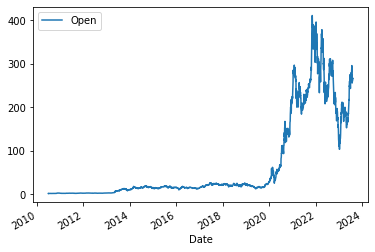

In [12]:
tesla_data.plot(x="Date", y="Open")

Graph with GameStop data from Yahoo Fianace

<AxesSubplot:xlabel='Date'>

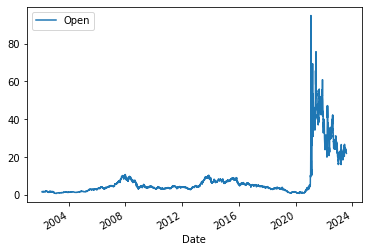

In [13]:
gameStop_data.plot(x="Date", y="Open")